# For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- 1. Do smokers have higher insurance charges than non-smokers?
- 2. Are men more likely to smoke than women?
- 3. Do different regions have different charges, on average?



For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

# Import Libraries

In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load Data

In [4]:
df = pd.read_csv("Data/insurance - insurance.csv")

# display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#  1. Do smokers have higher insurance charges than non-smokers?

## 1. State Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in the insurance charges between smokers and non-smokers.

**Alternative Hypothesis**: There is a difference in the insurance charges between smokers and non-smokers. 

(Smokers have higher insurance charges than non-smokers.)

## 2. Select correct test according to the data type and number of samples

In [6]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

**Test Type**: 2-sample Independent T-Test

- T-Test because it is numerical
- Independent because different participants are in each group (smokers vs non-smokers)
- Number of samples > 15 for each group

## 3. Test the assumptions of your selected test


T-Test Assumptions:

- No significant outliers
- Normality 
- Equal Variance 

In [7]:
smoker_insurance = df.loc[df['smoker']=='yes',"charges"]
nonsmoker_insurance = df.loc[ df['smoker']=='no',"charges"]

# Print average charge for each group
print(f"For Smoker (n={len(smoker_insurance)}): Mean={np.mean(smoker_insurance):.2f}")
print(f"For Non-Smoker (n={len(nonsmoker_insurance)}): Mean={np.mean(nonsmoker_insurance):.2f}")

For Smoker (n=274): Mean=32050.23
For Non-Smoker (n=1064): Mean=8434.27


### Check Outliers

In [8]:
#check for outliers in insurance charges in the Smoker group
zscores_f = stats.zscore(smoker_insurance)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

0

In [9]:
#check for outliers in insurance charges in the Non-Smoker group
zscores_f = stats.zscore(nonsmoker_insurance)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

24

### Remove Outliers

- we have 24 outliers in the non-smoker group

In [10]:
# remove outliers 
nonsmoker_insurance = nonsmoker_insurance[(np.abs(stats.zscore(nonsmoker_insurance)) < 3)]

### Test for Normality

In [12]:
# normal test: smokers
results_smoker = stats.normaltest(smoker_insurance)
results_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

- The p-value is less than 0.05, but, the sample size is greater than 15, so we can continue.

In [13]:
# normal test: non-smokers
results_nonsmoker = stats.normaltest(nonsmoker_insurance)
results_nonsmoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- Both groups have a p-value of less than 0.05, however, since the sample size for each group is more than 15, we can continue.

### Test for Equal Variance

In [14]:
result = stats.levene(smoker_insurance, nonsmoker_insurance)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- Since the p-value is less than 0.05, we do not have equal variance. 

- We will need to include "equal_var = False" when we perform our t-test.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

In [15]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_insurance, nonsmoker_insurance, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

## 5. Interpret your p-value and reject or fail to reject your null hypothesis 

- The p-value < alpha (0.05), so we reject the null hypothesis and accept that there is a significant difference in the insurance charges between smokers and non-smokers.

## 6. Show visualization that displays the result

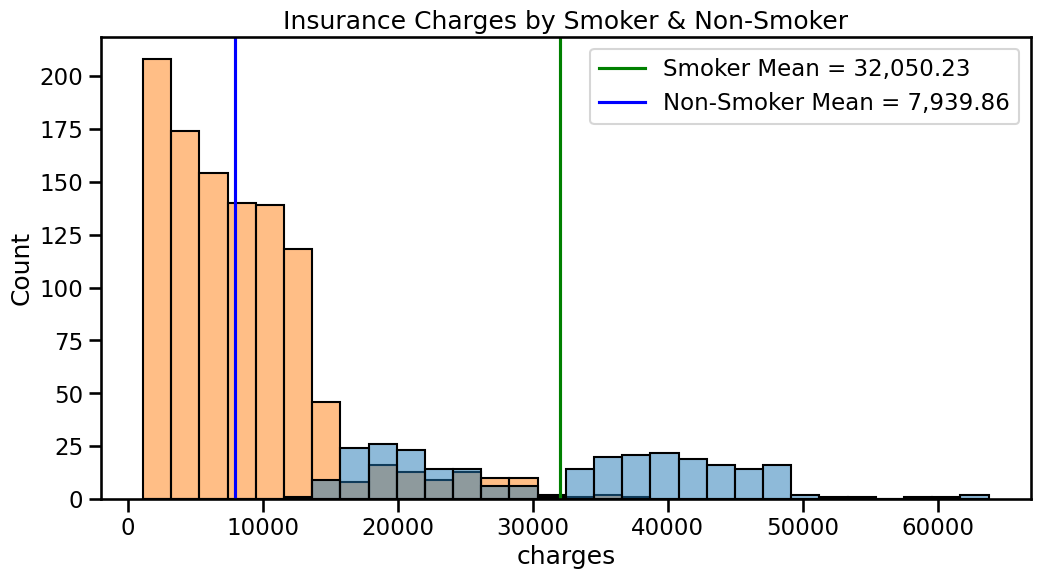

In [17]:
#calculate the statistical values
smoker_mean = smoker_insurance.mean()
nonsmoker_mean = nonsmoker_insurance.mean()

# base plot
ax = sns.histplot(data=df, x='charges', hue='smoker')

# Add a line for the mean (red) of smoker insurance charges
ax.axvline(smoker_mean, color = 'green',label=f'Smoker Mean = {smoker_mean:,.2f}')
# Add a line for the mean (green) of non-smoker insurance charges
ax.axvline(nonsmoker_mean, color = 'blue', label = f'Non-Smoker Mean = {nonsmoker_mean:,.2f}')

# Add title to the plot
ax.set_title('Insurance Charges by Smoker & Non-Smoker')

# Add legend to the plot
ax.legend();

# 2. Are men more likely to smoke than women?

## 1. State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis**: There is no difference in the likelihood of smoking between men and women.

**Alternative Hypothesis**: Sex influences the likelihood of smoking. (Men are more likely to smoke than women.)

## 2. Select the correct test according to the data type and number of samples

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

**Test-Type**: Chi-Square test (Categorical Hypothesis Testing)

**Justification**:

- The column of interest (target column) is 'smoker' (yes/no).
- We are comparing a binary target category: 'smoker' (yes/no) vs. categorical groups: 'sex' (female/male).

## 3. Test the assumptions of your selected test.

> Chi-Square test assumptions:
>
> - There are two categorical variables (ordinal or nominal)
> - The outcomes are independent.

### Two categorical variables

1. 'smoker'
2. 'sex'

### Outcomes are independent

Participants are each in a group (male vs female), so outcomes are independent.

## 4. Execute the selected test, or the alternative test (if you do not meet the assumptions)

### Contingency Table with `pd.crosstab`

In [20]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [21]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [22]:
# Display p-value and check against alpha
print(p)
p<.05

0.006548143503580696


True

## 5. Interpret your p-value and reject or fail to reject your null hypothesis \

P-value is less than 0.05, so we have a significant result.

Since the p-value < .05, we can reject the null hypothesis that there is no relationship between sex and likelihood of being a smoker.

We can accept the alternate hypothesis and conclude that men are more likely to smoke than women.

## 6. Show visualization that helps display the result

Text(0.5, 1.0, 'Smoker by sex')

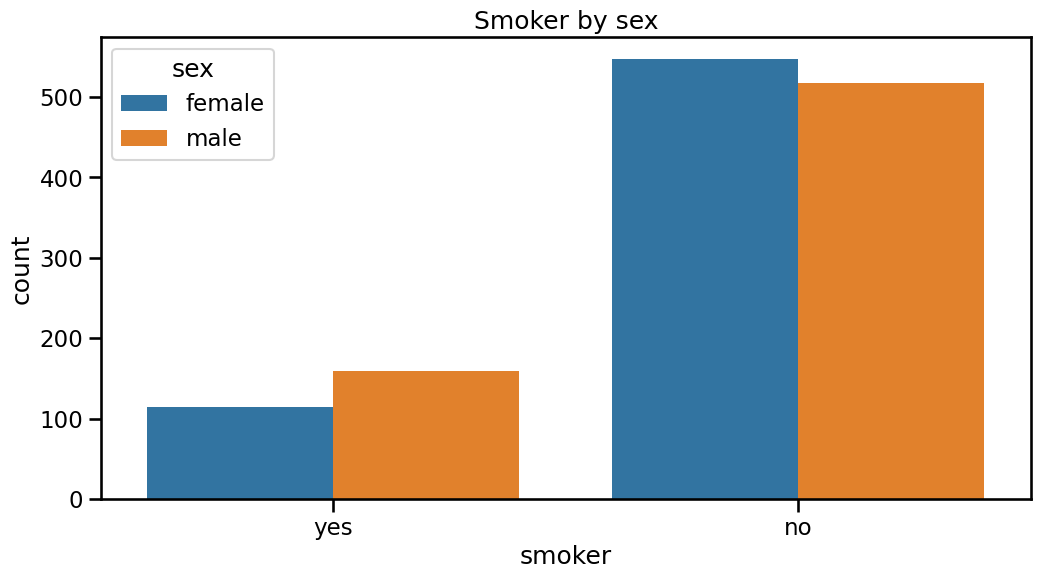

In [24]:
ax = sns.countplot(data=df, x='smoker', hue='sex')

# Add title to the plot
ax.set_title('Smoker by sex')

# 3. Do different regions have different charges, on average?



## 1. State your Null Hypothesis and Alternative Hypothesis

**Null Hypothesis:** There is no significant difference in insurance charges between the regions.  All group's means are the same.

**Alternative Hypothesis:** There is a significantly difference in insurance charges between the regions.  There is a difference in the group's means

## 2. Select hypothesis test 


- We are comparing charges (numerical) between four different regions/groups 
    
- The appropriate test to perform would be:
        
      - One Way ANOVA have the following Assumptions:
            - No significant outliers
            - Normality
            - Equal Variance



### Separating Groups

In [25]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Testing Assumptions

**Assumption of Normality**

In [26]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [27]:
### check sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- Regions are all significantly different from each other. 

## 3. Testing Assumption of Equal Variance

In [28]:
# with the * operator 
result = stats.levene(*groups.values())
print(result)
print(result.pvalue<.05) 

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)
True


- The null hypothesis for the test is that both groups have equal variance. 

- Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.

## 4. Statistical Testing

- Does not meet the Equal Variance Assumption.
- We need to do the Non-Parametric Test Equivalent.

In [29]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
print(result)
print(result.pvalue<.05)

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)
False


## 5. Interpret p-value and reject or fail to reject your null hypothesis

 - We fail to reject the null hypothesis.  The regions do not have significant difference in insurance charges.

## 6. Show visualization to display result

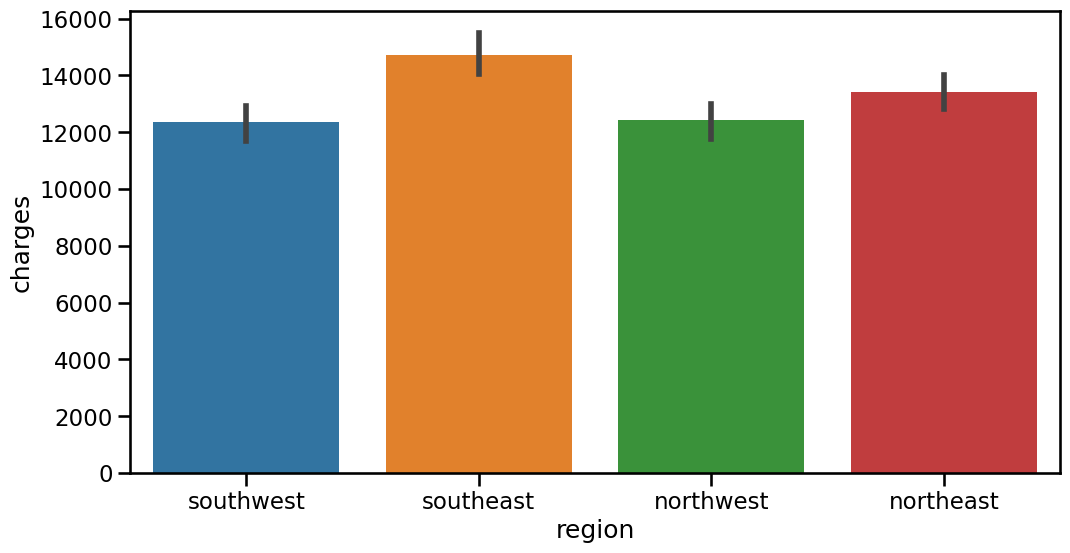

In [30]:
## visualizing means. ci=68 makes easier to compare error bars 
ax = sns.barplot(data=df, x='region', y='charges', errorbar=('ci', 68))